
# IFT3395/6390 Devoirs 1
## 3. Partie pratique : estimation de densité

travail préparé par : 
Amina Madzhun (matricule 20052277)
et 
Georgiy Gegiya (matricule 1005468)


### 1. Estimateur de densité paramétrique Gaussien diagonal

In [5]:
import numpy as np


class GaussianDiagonal:

    def __init__(self):
        self.mean = np.array([])
        self.sigma_square = np.array([])
        self.normalisation_constant = 0

    def train(self, train_data):
        """
        Calculate actual mean and covariance matrix for the given distribution
        :param train_data: n - dimensional np.array, where the each row is a sample vector
        :return:
        """
        num_examples = train_data.shape[0]
        num_dimensions = train_data.shape[1] if len(train_data.shape) > 1 else 1
        self.mean = np.mean(train_data, axis=0)
        self.sigma_square = np.sum((train_data - self.mean) ** 2, axis=0) / num_examples
        self.normalisation_constant = - num_dimensions * np.log(2 * np.pi) / 2.0 - num_dimensions * np.log(np.prod(self.sigma_square)) / 2.0

    def compute_predictions(self, test_data):
        """
        Calculate the probability log for the each sample in the provided test data
        :param test_data: n - dimensional np.array, where the each row is a sample vector
        :return:
        """
        if len(test_data.shape) > 1:
            return self.normalisation_constant - np.sum((test_data - self.mean) ** 2 / (2 * self.sigma_square), axis=1)
        else:
            return self.normalisation_constant - (test_data - self.mean) ** 2 / (2 * self.sigma_square)

### 2. Estimateur de densité de Parzen à noyau Gaussien isotropique

In [7]:
class ParzenIsotropicDensityEstimator:

    def __init__(self, sigma):
        self.train_data = None
        self.sigma = sigma
        self.num_dimensions = 0
        self.num_samples = 0

    def kernel_function(self, x, mean):
        """
        Gaussian isotropic density function
        :param x: sample vector as np.array
        :param mean: mean point as np.array
        :return:
        """
        part1 = 1 / ((self.sigma ** self.num_dimensions) * ((2 * np.pi) ** (self.num_dimensions / 2.0)))
        part2 = (-1 / 2.0) * np.sum((x - mean) ** 2.0) / (self.sigma ** 2.0)
        return float(part1 * np.exp(part2))

    def train(self, train_data):
        """
        Store the train data
        :param train_data:
        :return:
        """
        self.train_data = train_data
        self.num_samples = train_data.shape[0]
        self.num_dimensions = train_data.shape[1] if len(train_data.shape) > 1 else 1

    def avg_density(self, x):
        """
        This is a soft Parzen window method, all the train data will be used to compute the prediction
        :param x:
        :return:
        """
        sum_all = 0
        for row in self.train_data:
            sum_all += self.kernel_function(x, row)
        return float(sum_all) / self.num_samples

    def compute_predictions(self, test_data):
        """
        Compute the log of the probability density function for the points in the given test data
        :param test_data:
        :return:
        """
        return np.log(np.array([self.avg_density(x) for x in test_data]))

### 3. Densités 1D

Le code suivant produit un graphique qui représente l'éstimation de la densité d'un sous-ensemble de données Iris. 
Le graphique contient:  
(a) les points du sous-ensemble de données (affichées sur l’axe des x )
(b) une courbe de la densité estimée par l'estimateur paramétrique Gaussien
(c) une courbe de la densité estimée par l'estimateur de Parzen avec un hyper-paramètre σ (écart type) trop petit (0.05)
(d) une courbe de la densité estimée par l'estimateur de Parzen avec un hyper-paramètre σ un peu trop grand (2.0)
(e) une courbe de la densité estimée par l’estimateur de Parzen avec un hyper-paramètre σ que vous jugerez plus approprié (0.2)
￼

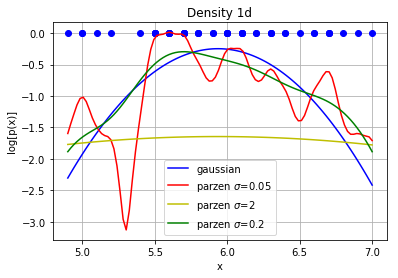

In [11]:
from matplotlib import pyplot as plt

def test_1d():
    # prepare data
    iris = np.loadtxt("iris.txt")
    data_set = iris[iris[:, 4] == 2][:, 0]

    # draw
    plt.figure()
    plt.title('Density 1d')
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("log[p(x)]")

    plot_points1d(data_set)
    legend = [plot_gauss1d(data_set)]

    for h, color in [(0.05, "r"), (2, "y"), (0.2, "g")]:
        legend.append(plot_parzen1d(data_set, h, color))
    plt.legend(handles=legend)
    plt.show()


def plot_points1d(data_set):
    plt.plot(data_set, np.zeros(len(data_set)), 'bo')


def plot_gauss1d(data_set):
    # train
    estimator = GaussianDiagonal()
    estimator.train(data_set)

    # compute predictions
    (min_x1, max_x1) = (min(data_set), max(data_set))
    xgrid = np.linspace(min_x1, max_x1, num=100)
    y = estimator.compute_predictions(xgrid)

    # draw
    gauss, = plt.plot(xgrid, y, c="b", label="gaussian")
    return gauss


def plot_parzen1d(data_set, h, color):
    # train
    estimator = ParzenIsotropicDensityEstimator(h)
    estimator.train(data_set)

    # compute predictions
    (min_x1, max_x1) = (min(data_set), max(data_set))
    xgrid = np.linspace(min_x1, max_x1, num=100)
    y = estimator.compute_predictions(xgrid)

    # draw
    parzen, = plt.plot(xgrid, y, c=color, label=r"parzen $\sigma$=%s" % h)
    return parzen

test_1d()

### Densités 2D
Ajoutez maintenant un second trait caractéristique d’iris, afin d’avoir des entrées en dimension d = 2 et produisez 4 graphiques, chacun affichant les points du sous-ensemble de données (avec la fonction plot), et les lignes de contours de la densit ́e estimée (à l’aide de la fonction contour) suivante :
(a) par votre estimateur param ́etrique Gaussien diagonal
(b) par l’estimateur de Parzen avec un hyper-paramètre σ (écart type) trop petit
(c) par l’estimateur de Parzen avec un hyper-paramètre σ un peu trop grand
(d) par l’estimateur de Parzen avec un hyper-paramètre σ que vous jugerez plus approprié.


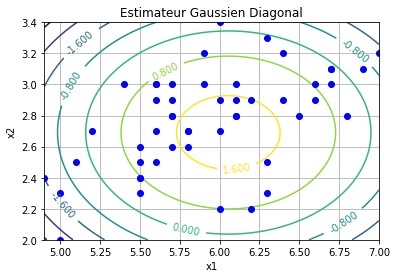

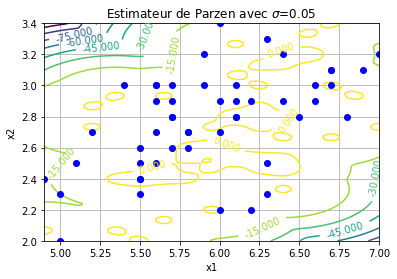

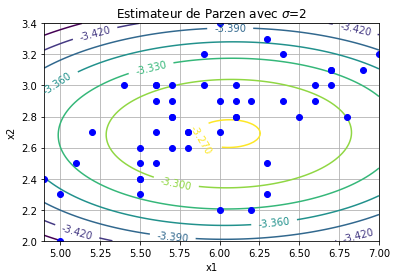

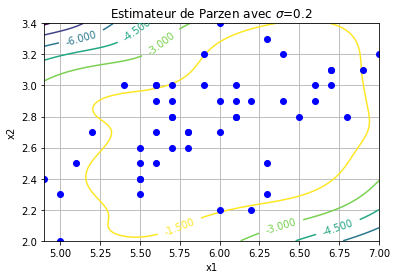

In [10]:
def test_2d():
    iris = np.loadtxt("iris.txt")
    data_set = iris[iris[:, 4] == 2][:, [0, 1]]
    plot_gaussian2d(data_set)
    plot_parzen2d(data_set, 0.05)
    plot_parzen2d(data_set, 2)
    plot_parzen2d(data_set, 0.2)
    plt.show()


def plot_parzen2d(data_set, h):
    # train
    estimator = ParzenIsotropicDensityEstimator(h)
    estimator.train(data_set)

    # compute predictions
    (min_x0, max_x0) = (min(data_set[:, 0]), max(data_set[:, 0]))
    xgrid = np.linspace(min_x0, max_x0, num=100)
    (min_x1, max_x1) = (min(data_set[:, 1]), max(data_set[:, 1]))
    ygrid = np.linspace(min_x1, max_x1, num=100)
    # generate a cartesian product of 2 lists
    thegrid = np.array(np.meshgrid(xgrid, ygrid)).T.reshape(-1, 2)
    predictions = estimator.compute_predictions(thegrid)

    # draw
    plt.figure()
    plt.title(r"Estimateur de Parzen avec $\sigma$=%s" % h)
    plt.grid(True)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # draw points
    x0 = data_set[:, 0]
    x1 = data_set[:, 1]
    plt.plot(x0, x1, 'bo')

    # draw contours
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = predictions.reshape(100, 100)
    cs = plt.contour(X, Y, Z)
    plt.clabel(cs, inline=1, fontsize=10)


def plot_gaussian2d(data_set):
    # train
    estimator = GaussianDiagonal()
    estimator.train(data_set)

    # compute predictions
    (min_x0, max_x0) = (min(data_set[:, 0]), max(data_set[:, 0]))
    xgrid = np.linspace(min_x0, max_x0, num=100)
    (min_x1, max_x1) = (min(data_set[:, 1]), max(data_set[:, 1]))
    ygrid = np.linspace(min_x1, max_x1, num=100)
    # generate a cartesian product of 2 lists
    thegrid = np.array(np.meshgrid(xgrid, ygrid)).T.reshape(-1, 2)
    predictions = estimator.compute_predictions(thegrid)

    # draw
    plt.figure()
    plt.title("Estimateur Gaussien Diagonal")
    plt.grid(True)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # draw points
    x0 = data_set[:, 0]
    x1 = data_set[:, 1]
    plt.plot(x0, x1, 'bo')

    # draw contours
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = predictions.reshape(100, 100)
    cs = plt.contour(X, Y, Z)
    plt.clabel(cs, inline=1, fontsize=10)
    
test_2d()

## 4. Partie pratique : classifieur de Bayes
1. Mélangez les exemples de Iris (utilisez numpy.random.shuffle après
avoir initialisé le générateur aléatoire comme suit numpy.random.seed(123)). Puis divisez l’ensemble de tous les exemples en 2 : un ensemble d’entraînement, et un ensemble de validation. Préparez deux versions de chacun de ces ensembles : une version complète comportant les d = 4 traits caractéistiques. Et une version avec seulement les d = 2 pre- miers traits caractéristiques qu’on utilisera pour fins de visualisation.

In [12]:
def data_set_2():
    iris = np.loadtxt('iris.txt')[:, [0, 1, 4]]
    np.random.seed(123)
    indices1 = np.arange(0, 50)
    indices2 = np.arange(50, 100)
    indices3 = np.arange(100, 150)

    np.random.shuffle(indices1)
    np.random.shuffle(indices2)
    np.random.shuffle(indices3)

    iris_train1 = iris[indices1[:35]]
    iris_test1 = iris[indices1[35:]]
    iris_train2 = iris[indices2[:35]]
    iris_test2 = iris[indices2[35:]]
    iris_train3 = iris[indices3[:35]]
    iris_test3 = iris[indices3[35:]]

    iris_train = np.concatenate([iris_train1, iris_train2, iris_train3])
    iris_test = np.concatenate([iris_test1, iris_test2, iris_test3])
    return iris_train, iris_test


def data_set_4():
    iris = np.loadtxt('iris.txt')[:, [0, 1, 2, 3, 4]]
    np.random.seed(123)
    indices1 = np.arange(0, 50)
    indices2 = np.arange(50, 100)
    indices3 = np.arange(100, 150)

    np.random.shuffle(indices1)
    np.random.shuffle(indices2)
    np.random.shuffle(indices3)

    iris_train1 = iris[indices1[:35]]
    iris_test1 = iris[indices1[35:]]
    iris_train2 = iris[indices2[:35]]
    iris_test2 = iris[indices2[35:]]
    iris_train3 = iris[indices3[:35]]
    iris_test3 = iris[indices3[35:]]

    iris_train = np.concatenate([iris_train1, iris_train2, iris_train3])
    iris_test = np.concatenate([iris_test1, iris_test2, iris_test3])
    return iris_train, iris_test

### Classifieur de Bayes
Un classificateur de Bayes générique qui prend le modèle (Gaussien ou Parzen) en paramètre
La méthode train() prend l'ensemble de donées et entraine le classificateur 


In [15]:
class BayesClassModel:

    def __init__(self, label, model, prior):
        self.label = label
        self.model = model
        self.prior = prior

    def compute_predictions(self, test_data):
        model_prediction = self.model.compute_predictions(test_data) + np.log(self.prior)
        return model_prediction


class BayesClassificator:

    def __init__(self, model, **kwargs):
        self.data_set = np.array([])
        self.classes = []
        self.model = model
        self.model_args = kwargs

    def train(self, data_set):
        """
        extract classes and calculate priors for each class
        :param data_set:
        :return:
        """
        label_set = set(data_set[:, -1])  # last column
        for label in label_set:
            model = self.model(**self.model_args)
            # select entries with for the current class
            train_set = data_set[data_set[:, -1] == label][:, :-1]  # all columns except the last one
            model.train(train_set)
            prior = len(train_set) / float(len(data_set))
            self.classes.append(BayesClassModel(label, model, prior))

    def compute_predictions(self, test_data):
        predictions = np.empty((test_data.shape[0], len(self.classes)))
        for idx, _class in enumerate(self.classes):
            predictions[:, idx] = _class.compute_predictions(test_data)
        return predictions
    

### Classifieur de Bayes basé sur des densités paramétriques Gaussiennes diagonales.
(b) Visualisation en dimension d = 2 : Considérant seulement les deux premiers traits caractéistiques d’iris, entrainez votre classifieur de Bayes sur votre ensemble d’entrainement; affichez un graphique avec les régions de décision obtenues (ainsi que les points des ensembles d’entrainement et de validation).

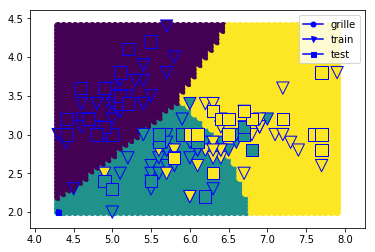

In [38]:
import utilitaires

classifier = BayesClassificator(GaussianDiagonal)
iris_train, iris_test  = data_set_2()
classifier.train(iris_train)
test_cols = [0, 1]
utilitaires.gridplot(classifier,
                     iris_train[:, test_cols + [-1]],
                     iris_test[:, test_cols + [-1]],
                     n_points=50)
    

(c) Calcul des erreurs en dimension d = 2 : calculez et affichez le taux d’erreur de votre classifieur (entrainé sur les 2 premier traits caractéristiques), à la fois sur l’ensemble d’entrainement et de validation.

In [36]:
classifier = BayesClassificator(GaussianDiagonal)
iris_train, iris_test  = data_set_2()
classifier.train(iris_train)

test_cols = [0, 1]
# on peut maintenant calculer les logs-probabilites selon nos modeles
log_prob_train = classifier.compute_predictions(iris_train[:, test_cols])
log_prob_test = classifier.compute_predictions(iris_test[:, test_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classes_pred_train = log_prob_train.argmax(axis=1) + 1
classes_pred_test = log_prob_test.argmax(axis=1) + 1

err_train = (1 - (classes_pred_train == iris_train[:, -1]).mean()) * 100.0
err_test = (1 - (classes_pred_test == iris_test[:, -1]).mean()) * 100.0
print("Taux d'erreur (entrainement) %.2f%%" % err_train)
print("Taux d'erreur (test) %.2f%%" % err_test)
    


Taux d'erreur (entrainement) 22.86%
Taux d'erreur (test) 20.00%


(d) Calcul des erreurs en dimension d = 4 : Entrainez votre classifieur en utilisant tous les traits caractéistiques. Puis calculez et affichez le taux d’erreur de votre classifieur (entrainé sur tous les traits caractéistiques), à la fois sur l’ensemble d’entrainement et de validation.

In [37]:
classifier = BayesClassificator(GaussianDiagonal)
iris_train, iris_test  = data_set_4()
classifier.train(iris_train)

test_cols = [0, 1, 2, 3]
# on peut maintenant calculer les logs-probabilites selon nos modeles
log_prob_train = classifier.compute_predictions(iris_train[:, test_cols])
log_prob_test = classifier.compute_predictions(iris_test[:, test_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classes_pred_train = log_prob_train.argmax(axis=1) + 1
classes_pred_test = log_prob_test.argmax(axis=1) + 1

err_train = (1 - (classes_pred_train == iris_train[:, -1]).mean()) * 100.0
err_test = (1 - (classes_pred_test == iris_test[:, -1]).mean()) * 100.0
print("Taux d'erreur (entrainement) %.2f%%" % err_train)
print("Taux d'erreur (test) %.2f%%" % err_test)

Taux d'erreur (entrainement) 4.76%
Taux d'erreur (test) 4.44%


### Classifieur de Bayes basé sur des densités de Parzen avec noyau Gaussien isotropique

(a) On va utiliser le même classsificatuer avec un autre modèle

(b) Visualisation en dimension d = 2. Considérant seulement les deux premiers traits caractéristiques d’iris, entrainez votre classifieur de Bayes sur votre ensemble d’entrainement; affichez un graphique avec les régions (surface) de décision obtenues (ainsi que les points des ensembles d’entrainement et de validation). Produisez 3 tels graphiques de régions de décision : un avec un σ trop petit, trop grand, et approprié.

/Users/ggegiya1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


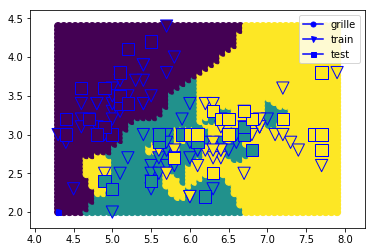

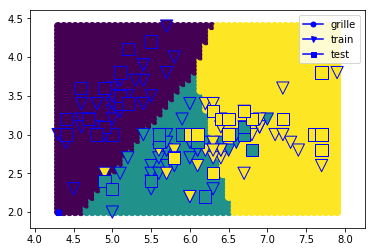

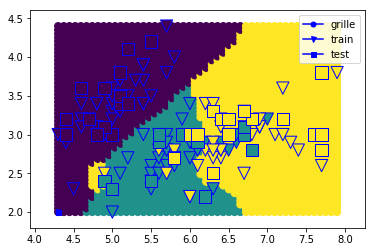

In [40]:
def compute_parzen_2(h):
    classifier = BayesClassificator(ParzenIsotropicDensityEstimator, sigma=h)
    iris_train, iris_test = data_set_2()
    classifier.train(iris_train)

    # on peut maintenant calculer les logs-probabilites selon nos modeles
    test_cols = [0, 1]
    utilitaires.gridplot(classifier,
                         iris_train[:, test_cols + [-1]],
                         iris_test[:, test_cols + [-1]],
                         n_points=50)

compute_parzen_2(0.05)
compute_parzen_2(2)
compute_parzen_2(0.2)

(c) Courbes d’apprentissage avec d = 2. Calculez le taux d’erreur de classification, à la fois sur l’ensemble d’entrainement, et sur l’ensemble de validation, en fonction des valeurs de l’hyper-paramètre σ (calculez-les pour une centaine de valeurs différentes de cet hyper- paramètre afin de pouvoir afficher la courbe). Indiquez la meilleure valeur de l’hyper-paramètre σ que vous avez trouvé.


Les méthodes suivantes calculent et présentent un graphique de taux d'erreur en fonction de sigma et de la dimensionnalité de l'ensemble d'entrainement

In [45]:
def parzen_error_rate(columns, data_set):
    sigmas = np.arange(0.0001, 1, 0.01)
    iris_train, iris_test = data_set()
    errors_test = []
    errors_train = []
    for s in sigmas:
        error_train, error_test = calculate_parzen_error(iris_train, iris_test, s, columns[:-1])
        errors_test.append(error_test)
        errors_train.append(error_train)

    plt.figure()
    plt.title('Parzen window model error rate for %s attributes' % (len(columns) - 1))
    plt.grid(True)
    plt.xlabel("$\sigma$")
    plt.ylabel(r"l($\sigma$)")
    train_, = plt.plot(sigmas, errors_train, c="b", label="train error")
    test_, = plt.plot(sigmas, errors_test, c="r", label="test error")
    plt.legend(handles=[train_, test_])
    opt_sigma = sigmas[np.argmin(errors_test)]
    plt.show()
    print("Taux d'erreur (entrainement) min %.2f%%" % (min(errors_train) * 100.0))
    print("Taux d'erreur (test) min %.2f%%" % (min(errors_test) * 100.0))
    print("Sigma optimal %.2f" % opt_sigma)


def calculate_parzen_error(iris_train, iris_test, sigma, train_cols):
    classifier = BayesClassificator(ParzenIsotropicDensityEstimator, sigma=sigma)

    # On cree notre classifieur avec notre liste de modeles gaussien et nos priors
    classifier.train(iris_train)

    # on peut maintenant calculer les logs-probabilites selon nos modeles
    # on peut maintenant calculer les logs-probabilites selon nos modeles
    log_prob_train = classifier.compute_predictions(iris_train[:, train_cols])
    log_prob_test = classifier.compute_predictions(iris_test[:, train_cols])

    # il reste maintenant a calculer le maximum par classe pour la classification
    classes_pred_train = log_prob_train.argmax(axis=1) + 1
    classes_pred_test = log_prob_test.argmax(axis=1) + 1
    error_train = 1 - (classes_pred_train == iris_train[:, -1]).mean()
    error_test = 1 - (classes_pred_test == iris_test[:, -1]).mean()
    return error_train, error_test


#### Courbes d’apprentissage avec d = 2

/Users/ggegiya1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


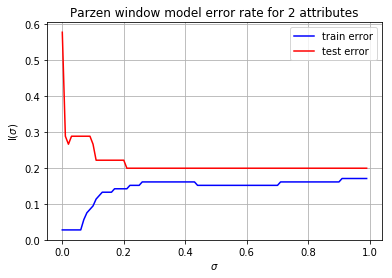

Taux d'erreur (entrainement) min 2.86%
Taux d'erreur (test) min 20.00%
Sigma optimal 0.21


In [46]:
parzen_error_rate([0, 1, 4], data_set_2)

#### Courbes d’apprentissage avec d = 4

/Users/ggegiya1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


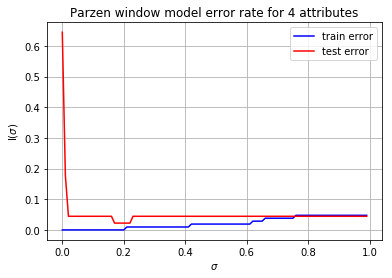

Taux d'erreur (entrainement) min 0.00%
Taux d'erreur (test) min 2.22%
Sigma optimal 0.17


In [47]:
parzen_error_rate([0, 1, 2, 3, 4], data_set_4)

### Résumé
D’après ces expériences, pour le problème de classification d’Iris (et pour cette division entrainement/validation particulière) on observe que le classifieur de Bayes avec fenêtres de Parzen montre les meilleurs résultats. Le taux d'erreur de test minimal atteint avec la méthode de fenêtres de Parzen est 2.22%, deux fois plus petit qu'avec la densité Gaussienne diagonale.

|           |Bayes avec Gaussienne diagonale    |Bayes avec fenêtres de Parzen         |
|-----------|-----------------------------------|--------------------------------------|
|dimension 2|Taux d'erreur (entrainement) 22.86%|Taux d'erreur (entrainement) min 2.86%|
|           |Taux d'erreur (test) 20.00%        |Taux d'erreur (test) min 20.00%       |
|           |                                   |Sigma optimal 0.21                    |
|           |                                   |                                      |
|dimension 4|Taux d'erreur (entrainement) 4.76% |Taux d'erreur (entrainement) min 0.00%|
|           |Taux d'erreur (test) 4.44%         |Taux d'erreur (test) min 2.22%        |
|           |                                   |Sigma optimal 0.17                    |

Ainsi, la meilleure choix d'hyper-paramètres est :  
 - classifieur de Bayes avec fenêtres de Parzen
 - dimension d'entrée : 4
 - hyper-paramètre sigma = 0.17